![Plane departing the Pacific Northwest](IMG_8801.JPG)

A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers. As the data analyst on the team, you decide to embark on this analytical project.

The aviation industry is dynamic with various variables impacting flight operations. To ensure the relevance and applicability of your findings, you choose to focus solely on flights from the 'pnwflights2022' datasets available from the ModernDive team exported as CSV files. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport): 

- `flights2022.csv` contains information about about each flight including 

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `dep_time`   | Departure time (in the format hhmm) where`NA` corresponds to a cancelled flight        |
| `dep_delay`  | Departure delay, in minutes (negative for early)    |
| `origin`     | Origin airport where flight starts (IATA code)
| `airline`    | Carrier/airline name                        |
| `dest`       | Destination airport where flight lands (IATA code)  

- `flights_weather2022.csv` contains the same flight information as well as weather conditions such as 
 
| Variable   | Description                                           |
|------------|-------------------------------------------------------|
| `visib`      | Visibility (in miles)                                 |
| `wind_gust`  | Wind gust speed (in mph)  

Which airlines and routes (for example "PDX-SFO") are most affected by flight delays, and what impact does wind have on departure delays?

- Load the two CSV files into separate DataFrames. Explore the data and create any new columns that might benefit your analysis.
- For routes, calculate the average departure delays and highest number of canceled flights and store this as a DataFrame called routes_delays_cancels, resetting the index after calculating.
- For airlines, determine the average departure delays and the highest number of canceled flights and store this as a DataFrame called airlines_delays_cancels, resetting the index after calculating.
- Produce two bar graphs to show (1) the top 9 highest number of cancellations by route in a plot called top9_route_cancels_bar and (2) the top 9 highest average departure delays by airline in a plot called top9_airline_delays_bar.
- Determine if 10 mile per hour wind gusts or more have a larger average departure delay for both of SEA and PDX, setting wind_response to True if so and False if not.

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data
flights_2022 = pd.read_csv("flights2022.csv")
flights_weather2022 = pd.read_csv("flights_weather2022.csv")

In [3]:
flights_2022.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.


In [5]:
# Create route column
flights_2022["route"] = flights_2022["origin"] + "-" + flights_2022["dest"]

In [6]:
# Calculate mean departure delay and number of canceled flights for each unique flight route
routes_delays_cancels = flights_2022.groupby("route").agg(
    mean_dep_delay=("dep_delay", "mean"),
    total_cancellations=("dep_time", lambda x: x.isna().sum())
).reset_index()
routes_delays_cancels.head()

,route,mean_dep_delay,total_cancellations
0,PDX-ABQ,1.098039,2
1,PDX-ANC,4.748936,4
2,PDX-ATL,7.020979,13
3,PDX-AUS,5.435374,5
4,PDX-BOI,5.136430,7


In [7]:
# Identify routes with the highest mean departure delays
top_routes_by_delay = routes_delays_cancels.sort_values("mean_dep_delay", ascending=False).head(9) 
top_routes_by_delay

,route,mean_dep_delay,total_cancellations
13,PDX-DSM,35.782609,0
19,PDX-GRR,35.739130,2
17,PDX-FLL,30.893617,3
109,SEA-MIA,29.916667,4
71,SEA-CLT,27.313199,14
52,PDX-STL,27.000000,0
5,PDX-BOS,24.812500,4
12,PDX-DFW,24.735941,23
9,PDX-DAL,24.100000,0


In [8]:
# Identify routes with the highest number of cancellations
top_routes_by_cancellations = routes_delays_cancels.sort_values("total_cancellations", ascending=False).head(9) 
top_routes_by_cancellations

,route,mean_dep_delay,total_cancellations
103,SEA-LAX,7.195969,93
58,SEA-ANC,9.316991,78
137,SEA-SFO,7.054403,73
102,SEA-LAS,8.943503,73
121,SEA-PDX,7.730982,71
98,SEA-JFK,17.305890,70
46,PDX-SEA,4.684694,68
76,SEA-DEN,8.302342,66
120,SEA-ORD,10.397800,63


/var/folders/rk/vsbmyjqx09n87m8t22syxyvr0000gn/T/ipykernel_14046/1658541679.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_routes_by_cancellations["route"], rotation=90)


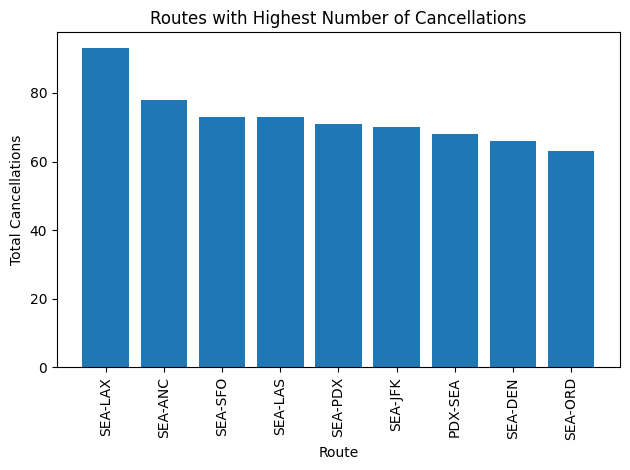

In [11]:
# Create a bar graph for highest number of cancellations
top9_route_cancels_bar, ax = plt.subplots()
ax.bar(top_routes_by_cancellations["route"], top_routes_by_cancellations["total_cancellations"])
ax.set_xlabel("Route")
ax.set_ylabel("Total Cancellations")
ax.set_title("Routes with Highest Number of Cancellations")
ax.set_xticklabels(top_routes_by_cancellations["route"], rotation=90)
plt.tight_layout()
plt.show()
plt.close()

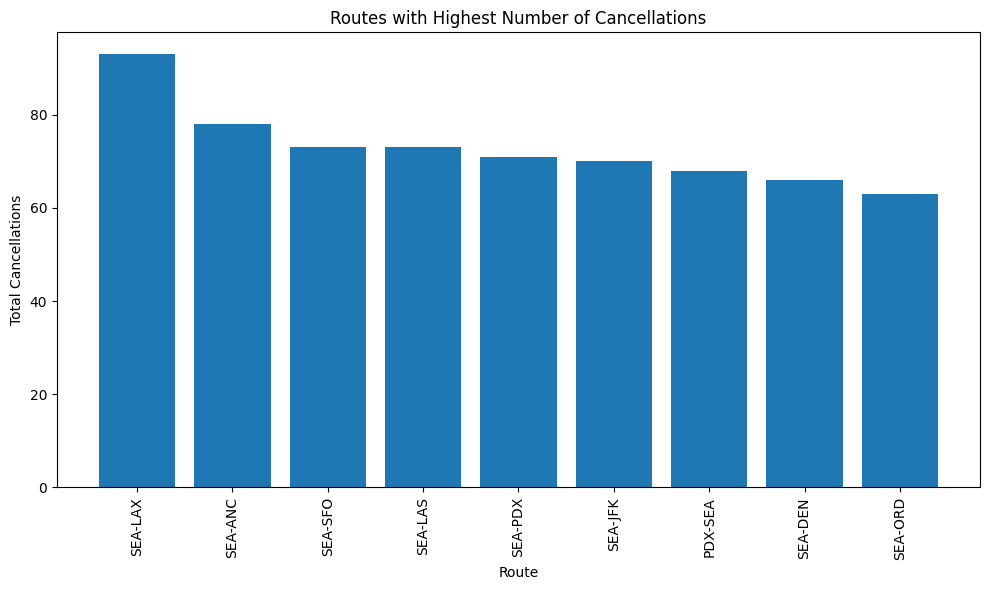

In [12]:
# Create your plot
fig, ax = plt.subplots(figsize=(10, 6))

# Example of a bar plot (adjust to match your actual plot type)
bars = ax.bar(range(len(top_routes_by_cancellations)), 
             top_routes_by_cancellations["total_cancellations"])  # Assuming this is your y-value column

ax.set_xlabel("Route")
ax.set_ylabel("Total Cancellations")
ax.set_title("Routes with Highest Number of Cancellations")
# First set the tick positions
ax.set_xticks(range(len(top_routes_by_cancellations)))

# Then set the tick labels
ax.set_xticklabels(top_routes_by_cancellations["route"], rotation=90)

plt.tight_layout()
plt.show()

In [13]:
# Find mean departure delays and total cancellations by airline
airlines_delays_cancels = flights_2022.groupby("airline").agg(
    mean_dep_delay=("dep_delay", "mean"),
    total_cancellations=("dep_time", lambda x: x.isna().sum())
).reset_index()
airlines_delays_cancels

,airline,mean_dep_delay,total_cancellations
0,Alaska Airlines Inc.,6.739282,1300
1,Allegiant Air,26.608696,6
2,American Airlines Inc.,20.129903,85
3,Delta Air Lines Inc.,10.648634,383
4,Frontier Airlines Inc.,14.355856,12
5,Hawaiian Airlines Inc.,8.186207,4
6,Horizon Air,6.270965,238
7,JetBlue Airways,42.141524,33
8,SkyWest Airlines Inc.,4.596561,165
9,Southwest Airlines Co.,11.407163,100


In [14]:
# Identify airlines with the highest mean departure delay
top_airlines_by_delay = airlines_delays_cancels.sort_values("mean_dep_delay", ascending=False).head(9) 
top_airlines_by_delay

,airline,mean_dep_delay,total_cancellations
7,JetBlue Airways,42.141524,33
1,Allegiant Air,26.608696,6
2,American Airlines Inc.,20.129903,85
4,Frontier Airlines Inc.,14.355856,12
9,Southwest Airlines Co.,11.407163,100
10,Spirit Air Lines,11.095758,39
3,Delta Air Lines Inc.,10.648634,383
5,Hawaiian Airlines Inc.,8.186207,4
11,United Air Lines Inc.,7.072115,80


In [15]:
# Identify airlines with the highest number of cancellations
top_airlines_by_cancellations = airlines_delays_cancels.sort_values("total_cancellations", ascending=False).head(9) 
top_airlines_by_cancellations

,airline,mean_dep_delay,total_cancellations
0,Alaska Airlines Inc.,6.739282,1300
3,Delta Air Lines Inc.,10.648634,383
6,Horizon Air,6.270965,238
8,SkyWest Airlines Inc.,4.596561,165
9,Southwest Airlines Co.,11.407163,100
2,American Airlines Inc.,20.129903,85
11,United Air Lines Inc.,7.072115,80
10,Spirit Air Lines,11.095758,39
7,JetBlue Airways,42.141524,33


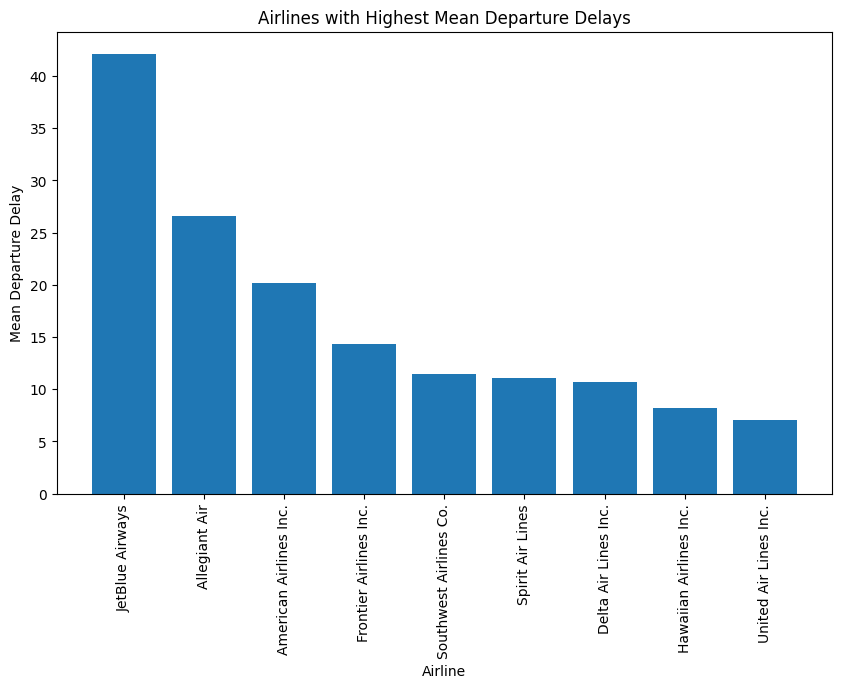

In [16]:
# Create a bar graph for highest mean depearture delay
top9_airline_delays_bar, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(range(len(top_airlines_by_delay['airline'])), 
             top_airlines_by_delay["mean_dep_delay"])  # Assuming this is your y-value column

# ax.bar(top_airlines_by_delay["airline"], top_airlines_by_delay["mean_dep_delay"])
ax.set_xlabel("Airline")
ax.set_ylabel("Mean Departure Delay")
ax.set_title("Airlines with Highest Mean Departure Delays")
ax.set_xticks(range(len(top_airlines_by_delay)))
ax.set_xticklabels(top_airlines_by_delay["airline"], rotation=90)
plt.show()

In [19]:
# Are departure delays impacted by 10+ mph winds from each airport
flights_weather2022["group"] = flights_weather2022["wind_gust"].apply(lambda x: ">= 10mph" if x >= 10 else "< 10 mph")

wind_grouped_data = flights_weather2022.groupby(["group", "origin"]).agg(mean_dep_delay=("dep_delay", "mean"))

flights_weather2022.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,group
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,< 10 mph
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0,>= 10mph
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,< 10 mph
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,< 10 mph
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0,< 10 mph


In [20]:
wind_grouped_data

mean_dep_delay
group    origin                
< 10 mph PDX           6.686966
         SEA           7.857595
>= 10mph PDX           9.147024
         SEA           9.231060